In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

# Dataframe
website = pd.read_csv('assessment_da25.csv')
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


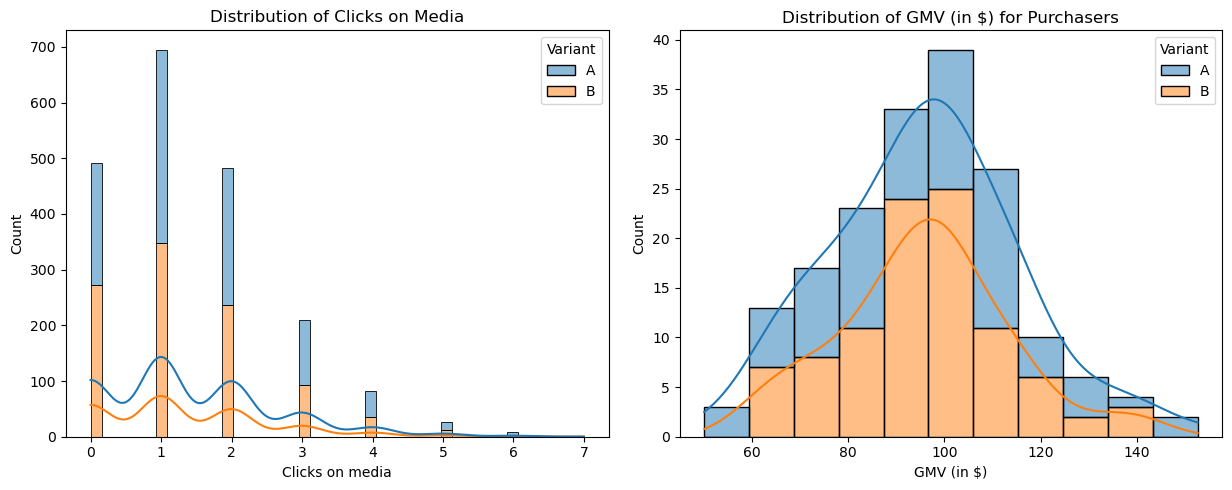

In [65]:
# Distributions for 'Clicks on media' and 'GMV for purchasers'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.histplot(data=website, x='Clicks on media', hue='Variant', kde=True, multiple='stack')
plt.title('Distribution of Clicks on Media')

purchasers_data = website[website['GMV (in $)'] > 0]

plt.subplot(1, 3, 3)
sns.histplot(data=purchasers_data, x='GMV (in $)', hue='Variant', kde=True, multiple='stack')
plt.title('Distribution of GMV (in $) for Purchasers')

plt.tight_layout()
plt.show()

In [66]:
# Parameters 'Clicks on media'
parameters_CoM = website.groupby('Variant')['Clicks on media'].mean()
print(parameters_CoM)

Variant
A    1.495
B    1.324
Name: Clicks on media, dtype: float64


In [52]:
# Parameters 'GMV (in $)' purchasers only
parameters_GMV = purchasers_data.groupby('Variant')['GMV (in $)'].mean()
print(parameters_GMV)

Variant
A    96.124875
B    95.768351
Name: GMV (in $), dtype: float64


In [67]:
# Total sample size in each variant
n_A = website[website['Variant'] == 'A']['user_id'].nunique()
n_B = website[website['Variant'] == 'B']['user_id'].nunique()

print('Variant A sample size:', n_A)
print('Variant B sample size:', n_B)

Variant A sample size: 1000
Variant B sample size: 1000


In [68]:
# Sample size for purchasers in each variant
count_purchasers_by_variant = purchasers_data['Variant'].value_counts()
print(count_purchasers_by_variant)

Variant
B    97
A    80
Name: count, dtype: int64


In [71]:
# Two sample t-test between variant A and B (Clicks on media)
clicks_A = website[website['Variant'] == 'A']['Clicks on media']
clicks_B = website[website['Variant'] == 'B']['Clicks on media']

CoM_ttest = pg.ttest(x=clicks_A, 
                     y=clicks_B,
                     paired=False,
                     alternative='greater')
print(CoM_ttest)

              T   dof alternative     p-val        CI95%   cohen-d    BF10  \
T-test  3.17107  1998     greater  0.000771  [0.08, inf]  0.141815  14.612   

           power  
T-test  0.936388  


In [75]:
# Two sample t-test between purchasers in variant A and B (GMV (in $))
GMV_A_purchasers = purchasers_data[purchasers_data['Variant'] == 'A']['GMV (in $)']
GMV_B_purchasers = purchasers_data[purchasers_data['Variant'] == 'B']['GMV (in $)']

# Perform one-sided t-test
GMV_ttest = pg.ttest(x=GMV_A_purchasers,
                     y=GMV_B_purchasers,
                     paired=False,
                     alternative='greater')
print(GMV_ttest)

               T         dof alternative    p-val         CI95%   cohen-d  \
T-test  0.118258  151.532503     greater  0.45301  [-4.63, inf]  0.018216   

         BF10     power  
T-test  0.329  0.063666  
